# Simple Diffusion Processes

The walker starts at the origin: \( x_0 = 0 \)
  
- At each time step \( t \), the walker moves one step to the left or right:  
  $$
  x_{t+1} = x_t + \begin{cases}
  +\delta x & \text{with probability } p \\
  -\delta x & \text{with probability } 1 - p
  \end{cases}
  $$

### Discrete Random Walk

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def random_walk(P, T):
    steps = np.zeros(T+1)  # T+1 to include s0
    for t in range(1, T+1):  # Start at 1 so that s0 = 0
        p = np.random.rand()  # Generate a random number in [0, 1)
        if P >= p:
            steps[t] = +1       # Step right
        else:
            steps[t] = -1       # Step left
    return steps

    no
# returns only -1 or 1 for each time step.

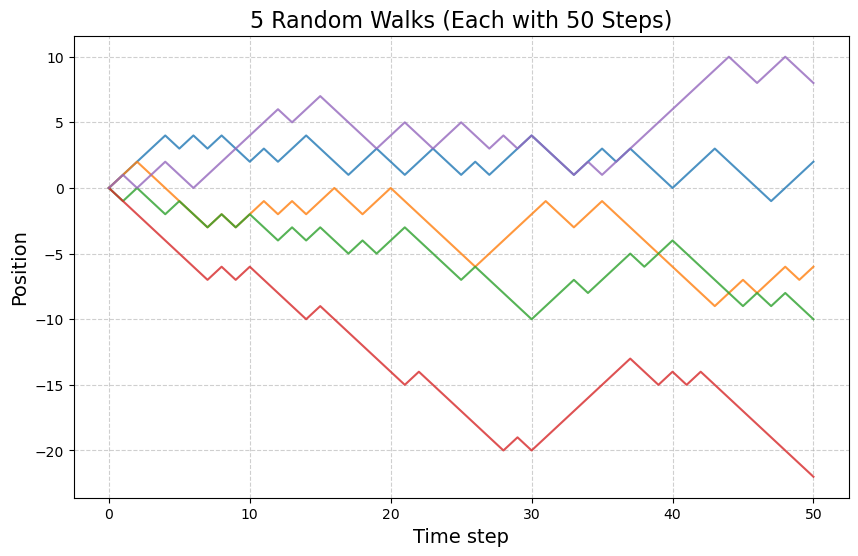

In [3]:
# Parameters
P = 0.5      # Probability of stepping right
T = 50      # Number of steps
N = 5       # Number of random walks to simulate

plt.figure(figsize=(10, 6))

for i in range(N):
    steps = random_walk(P, T)
    position = np.cumsum(steps)  # sum the steps to get position of each walker
    plt.plot(position, label=f'Walk {i+1}', alpha=0.8)

plt.xlabel('Time step', fontsize=14)
plt.ylabel('Position', fontsize=14)
plt.title(f'{N} Random Walks (Each with {T} Steps)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
#plt.legend(loc='upper left', fontsize=9)
plt.show()

### Continuous Case (Diffusion)

The random walk leads, in the continuum limit, to the **diffusion equation**:
$$
\frac{\partial P(x, t)}{\partial t} = D \frac{\partial^2 P(x, t)}{\partial x^2}
$$

where:
- \( P(x, t) \): probability density of finding the particle at position \( x \) at time \( t \)
- \( D \): diffusion coefficient, given by $$D = \frac{(\delta x)^2}{2 \delta t}$$

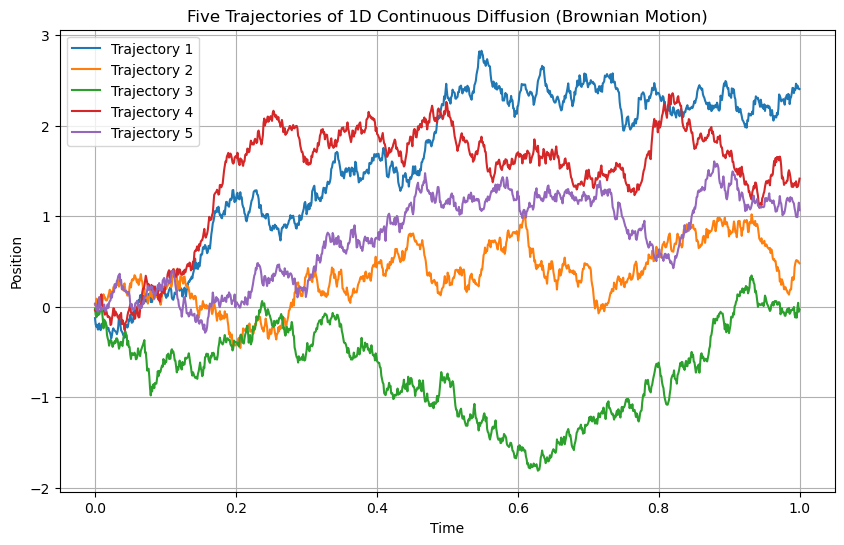

In [4]:
# Parameters
n_steps = 1000         # Number of time steps
T = 1.0                # Total time
dt = T / n_steps       # Time step
n_trajectories = 5     # Number of trajectories
D = 1.0                # Diffusion coefficient

# Time array
time = np.linspace(0, T, n_steps)

# Generate trajectories: Brownian motion x(t) = sqrt(2D) * W(t)
trajectories = []
for _ in range(n_trajectories):
    # Generate standard normal increments
    dW = np.sqrt(dt) * np.random.randn(n_steps)
    # Cumulative sum gives W(t)
    W = np.cumsum(dW)
    # Scale for diffusion coefficient
    x = np.sqrt(2 * D) * W
    trajectories.append(x)

# Plotting
plt.figure(figsize=(10, 6))
for i, traj in enumerate(trajectories):
    plt.plot(time, traj, label=f'Trajectory {i+1}')

plt.title('Five Trajectories of 1D Continuous Diffusion (Brownian Motion)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.grid(True)
plt.show()

## Position Distribution

It is given as: 
$$P(x,t) = \frac{1}{\sqrt{4\pi D t}} \exp\left(-\frac{x^2}{4Dt}\right)$$
Check attached PDF for derivation.

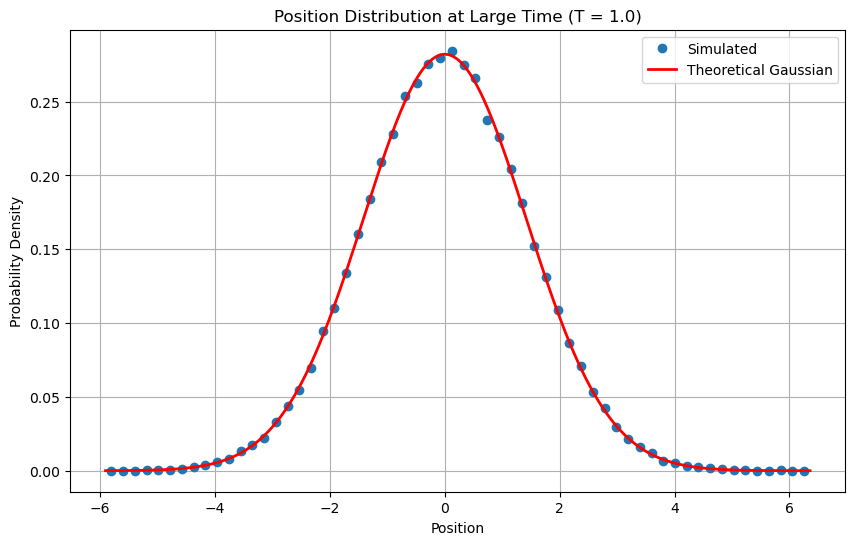

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
n_steps = 1000          # Number of time steps
T = 1.0                 # Total time
dt = T / n_steps        # Time step
n_particles = 100000     # Number of trajectories
D = 1.0                 # Diffusion coefficient

# Simulate Brownian motion
dW = np.sqrt(dt) * np.random.randn(n_particles, n_steps)
W = np.cumsum(dW, axis=1)
x_final = np.sqrt(2 * D) * W[:, -1]

# Create histogram data (but do not plot histogram bars)
counts, bin_edges = np.histogram(x_final, bins=60, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Plot empirical distribution as dots
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, counts, 'o', label='Simulated')

# Overlay theoretical Gaussian
mu = 0
sigma = np.sqrt(2 * D * T)
x_vals = np.linspace(min(x_final), max(x_final), 500)
plt.plot(x_vals, norm.pdf(x_vals, mu, sigma), 'r-', lw=2, label='Theoretical Gaussian')

plt.title('Position Distribution at Large Time (T = {:.1f})'.format(T))
plt.xlabel('Position')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()